In [475]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
os.chdir(r"C:\Users\VISHNU\Desktop")
df=pd.read_csv("work flow task .csv")
df

,Instance Size,vCPU,Memory (GiB),Instance Storage (GiB),Network Bandwidth (Gbps),EBS Bandwidth (Mbps)
0,c6g.medium,1,2,EBS-Only,Up to 10,48
1,c6g.large,2,4,EBS-Only,Up to 10,48
2,c6g.xlarge,4,8,EBS-Only,Up to 10,48
3,c6g.2xlarge,8,16,EBS-Only,Up to 10,5
4,c6g.4xlarge,16,32,EBS-Only,Up to 10,40
5,c6g.8xlarge,32,64,EBS-Only,12,9
6,c6g.12xlarge,48,96,EBS-Only,20,13
7,c6g.16xlarge,64,128,EBS-Only,25,19
8,c6g.metal,64,128,EBS-Only,25,19
9,c6gd.medium,1,2,1 x 59 NVMe SSD,Up to 10,48


In [476]:
df.columns

Index(['Instance Size', 'vCPU', 'Memory (GiB)', 'Instance Storage (GiB)',
       'Network Bandwidth (Gbps)', 'EBS Bandwidth (Mbps)'],
      dtype='object')

In [477]:
df.drop(["Instance Storage (GiB)"],axis=1,inplace=True)

In [478]:
df.head()

,Instance Size,vCPU,Memory (GiB),Network Bandwidth (Gbps),EBS Bandwidth (Mbps)
0,c6g.medium,1,2,Up to 10,48
1,c6g.large,2,4,Up to 10,48
2,c6g.xlarge,4,8,Up to 10,48
3,c6g.2xlarge,8,16,Up to 10,5
4,c6g.4xlarge,16,32,Up to 10,40


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Instance Size             44 non-null     object
 1   vCPU                      44 non-null     int64 
 2   Memory (GiB)              44 non-null     int64 
 3   Network Bandwidth (Gbps)  44 non-null     object
 4   EBS Bandwidth (Mbps)      44 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


In [480]:
df.isnull().sum()

Instance Size               0
vCPU                        0
Memory (GiB)                0
Network Bandwidth (Gbps)    0
EBS Bandwidth (Mbps)        0
dtype: int64

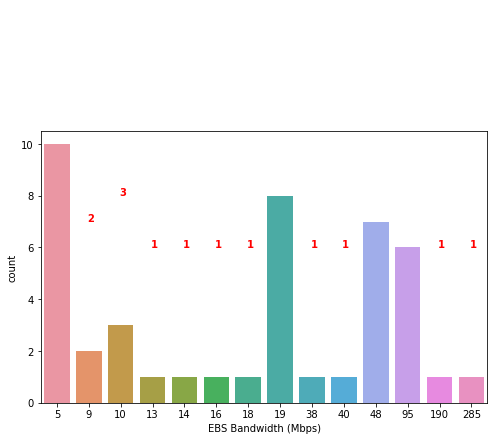

In [481]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='EBS Bandwidth (Mbps)',data=df)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+5),fontweight='bold',color='red')

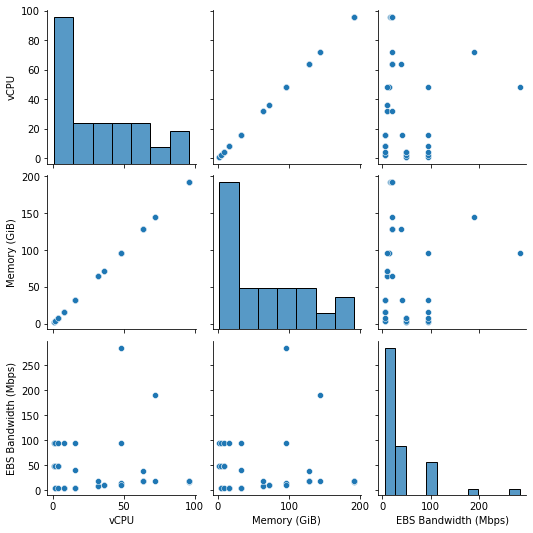

In [482]:
sns.pairplot(df)

<AxesSubplot:>

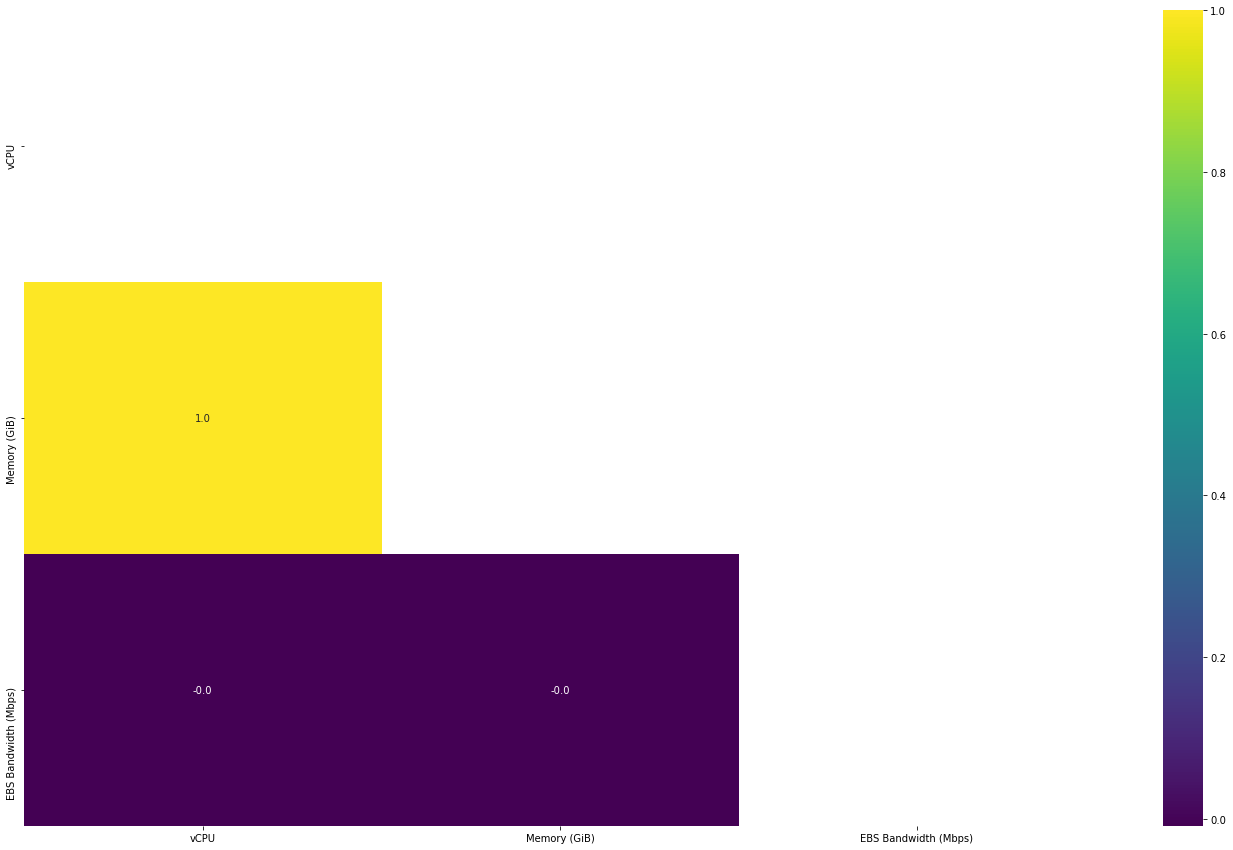

In [483]:
plt.figure(figsize=(24,15))
sns.heatmap(df.corr(),mask=np.triu(df.corr()),annot=True,fmt='.1f',cmap='viridis')

<AxesSubplot:>

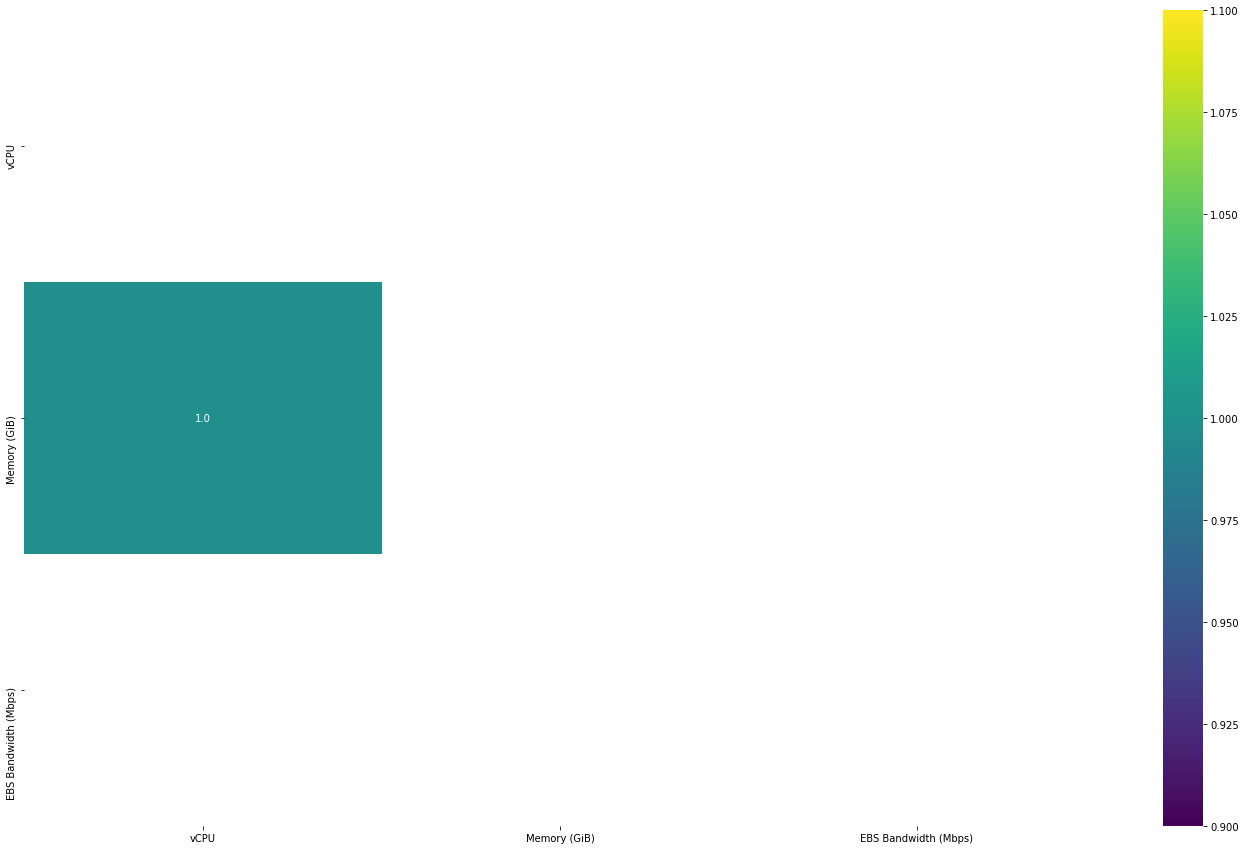

In [484]:
corr = df.corr()
corr_mat = corr[((corr > 0.6) | (corr < -0.6))]
plt.figure(figsize=(24,15))
sns.heatmap(corr_mat,mask=np.triu(corr_mat),annot=True,fmt='.1f',cmap='viridis')

Text(0.5, 1.0, 'Overall Correlation of features with Memory (GiB) ')

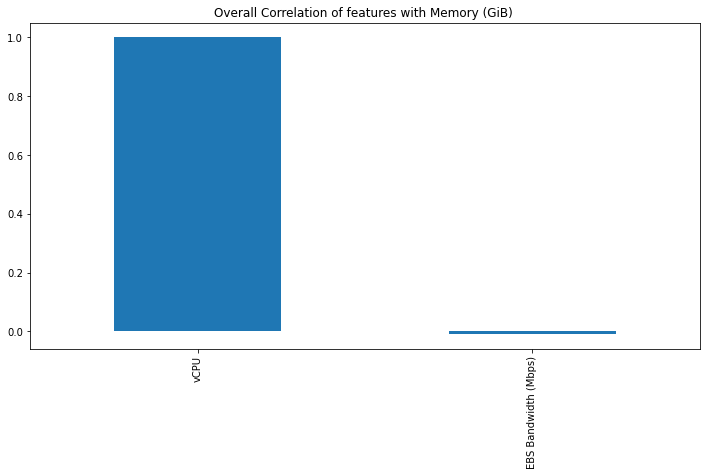

In [485]:
df.corr()["Memory (GiB)"].sort_values(ascending=False).drop("Memory (GiB)").plot(kind='bar',figsize=(12,6))
plt.title("Overall Correlation of features with Memory (GiB) ")

In [486]:
x=df["Memory (GiB)"].values
y=df["EBS Bandwidth (Mbps)"].values

In [487]:
from sklearn.model_selection import train_test_split

In [488]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=2/5,random_state=0)

In [489]:
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test= y_test.reshape(-1,1)

In [490]:
y=pd.get_dummies("EBS Bandwidth (Mbps)")


In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Instance Size             44 non-null     object
 1   vCPU                      44 non-null     int64 
 2   Memory (GiB)              44 non-null     int64 
 3   Network Bandwidth (Gbps)  44 non-null     object
 4   EBS Bandwidth (Mbps)      44 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


In [492]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [493]:
reg.score(x_train,y_train)*100

23.076923076923077

In [494]:
from sklearn.linear_model import SGDClassifier
reg=SGDClassifier()
reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)


D:\anaconda 2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [495]:
y_predict = regressor.predict(x_test)


In [496]:
score = regressor.score(x_test,y_test)

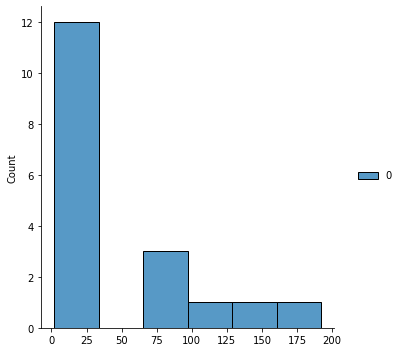

In [497]:
sns.displot(x_test)

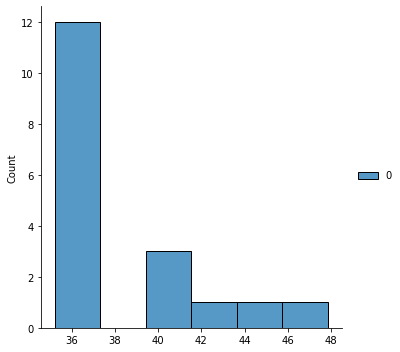

In [498]:
sns.displot(y_predict)

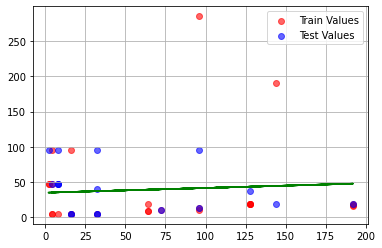

In [499]:
plt.scatter(x_train,y_train, color ='red', label='Train Values', alpha=0.6)
plt.scatter(x_test,y_test,color='blue', label ='Test Values', alpha=0.6)
plt.plot(x_train,regressor.predict(x_train),color='green')
plt.legend()
plt.grid()
plt.show()
